In [9]:
import pandas as pd
import numpy as np
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from nltk.sentiment import SentimentIntensityAnalyzer
from scipy.sparse import csr_matrix

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ramya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ramya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ramya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
# Load dataset
df = pd.read_csv("D:/Database/database/cleaned_datasets/cleaned_book_reviews.csv")

df

C:\Users\ramya\AppData\Local\Temp\ipykernel_14056\2258313935.py:2: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:/Database/database/cleaned_datasets/cleaned_book_reviews.csv")


,review_id,platform,asin,book_name,author,reviewer_name,review_title,review_text,rating,review_date,review_timestamp,verified,helpful,combined_review,cleaned,no_stopwords,lemmatized,tokens
0,48235e132322f1f1d38273eb33bde48f,Amazon,B0033UV8HI,Not Available,Not Available,Ridley,Entertaining But Average,"Jace Rankin may be short, but he's nothing to ...",3,2010-09-02,1283385600,False,"[8, 10]",Entertaining But Average Jace Rankin may be sh...,entertaining but average jace rankin may be sh...,entertaining average jace rankin may short hes...,entertaining average jace rankin may short he ...,"['entertaining', 'average', 'jace', 'rankin', ..."
1,ef97bbe96ff2ffe7dfb0852e39a0e1ea,Amazon,B002HJV4DE,Not Available,Not Available,Holly Butler,Terrific menage scenes!,Great short read. I didn't want to put it dow...,5,2013-10-08,1381190400,False,"[1, 1]",Terrific menage scenes! Great short read. I d...,terrific menage scenes great short read i didn...,terrific menage scenes great short read didnt ...,terrific menage scene great short read didnt w...,"['terrific', 'menage', 'scene', 'great', 'shor..."
2,ffa408e5333fda43220110b396f469d9,Amazon,B002ZG96I4,Not Available,Not Available,Merissa,Snapdragon Alley,I'll start by saying this is the first of four...,3,2014-04-11,1397174400,False,"[0, 0]",Snapdragon Alley I'll start by saying this is ...,snapdragon alley ill start by saying this is t...,snapdragon alley ill start saying first four b...,snapdragon alley ill start saying first four b...,"['snapdragon', 'alley', 'ill', 'start', 'sayin..."
3,d5b5ad9a44016bc335af15c715efa85d,Amazon,B002QHWOEU,Not Available,Not Available,Cleargrace,very light murder cozy,Aggie is Angela Lansbury who carries pocketboo...,3,2014-07-05,1404518400,False,"[1, 3]",very light murder cozy Aggie is Angela Lansbur...,very light murder cozy aggie is angela lansbur...,light murder cozy aggie angela lansbury carrie...,light murder cozy aggie angela lansbury carry ...,"['light', 'murder', 'cozy', 'aggie', 'angela',..."
4,6f54882f555c3a31bf0bc5a2d007e1e8,Amazon,B001A06VJ8,Not Available,Not Available,Rjostler,Book,I did not expect this type of book to be in li...,4,2012-12-31,1356912000,False,"[0, 1]",Book I did not expect this type of book to be ...,book i did not expect this type of book to be ...,book expect type book library pleased find pri...,book expect type book library pleased find pri...,"['book', 'expect', 'type', 'book', 'library', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79462,0bbafa54ee3f1f8485989d717f8e0285,CustomerReviews,1492646318,How to Catch an Elf,Adam Wallace,Carol Mccoy,A cute Christmas book for STEM,Definitely a cute read aloud book to get kids ...,5,2023-09-04,"Reviewed in the United States September 4, 2023",1.0,0,A cute Christmas book for STEM Definitely a cu...,a cute christmas book for stem definitely a cu...,cute christmas book stem definitely cute read ...,cute christmas book stem definitely cute read ...,"['cute', 'christmas', 'book', 'stem', 'definit..."
79463,7898c8d5febb0343f769a569dbd086a8,CustomerReviews,1501161938,The Seven Husbands of Evelyn Hugo: A Novel,Morgan Housel,Chelscey,Hollywood hasn't changed much,Starting at the young age of fourteen and endi...,5,2022-04-25,"Reviewed in the United States April 25, 2022",1.0,0,Hollywood hasn't changed much Starting at the ...,hollywood hasnt changed much starting at the y...,hollywood hasnt changed much starting young ag...,hollywood hasnt changed much starting young ag...,"['hollywood', 'hasnt', 'changed', 'much', 'sta..."
79464,ac52669eb95d9637b39a39d44bd48fa9,CustomerReviews,385534264,"The Wager: A Tale of Shipwreck, Mutiny and Murder",David Grann,bayrider,Very Good Narrative Nonfiction,I really liked this work of narrative nonficti...,4,2023-09-09,"Reviewed in the United States September 9, 2023",1.0,0,Very Good Narrative Nonfiction I really liked ...,very good narrative nonfiction i really liked ...,good narrative nonfiction really liked work na...,g

In [11]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned'] = df['combined_review'].apply(clean_text)


In [12]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [13]:
def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return tokens

df['tokens'] = df['cleaned'].apply(preprocess)


In [14]:
df['joined'] = df['tokens'].apply(lambda x: ' '.join(x))

In [22]:
# PART 1: TF-IDF Vectorization 

print("\nTF-IDF")

# Example configuration
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, min_df=5, max_df=0.8)
X_tfidf = vectorizer.fit_transform(df['joined'])

print("TF-IDF Feature Matrix:")
print("Shape:", X_tfidf.shape)
print("Sparsity: {:.2f}%".format(100.0 * (1.0 - X_tfidf.count_nonzero() / (X_tfidf.shape[0] * X_tfidf.shape[1]))))


TF-IDF
TF-IDF Feature Matrix:
Shape: (79467, 1000)
Sparsity: 94.99%


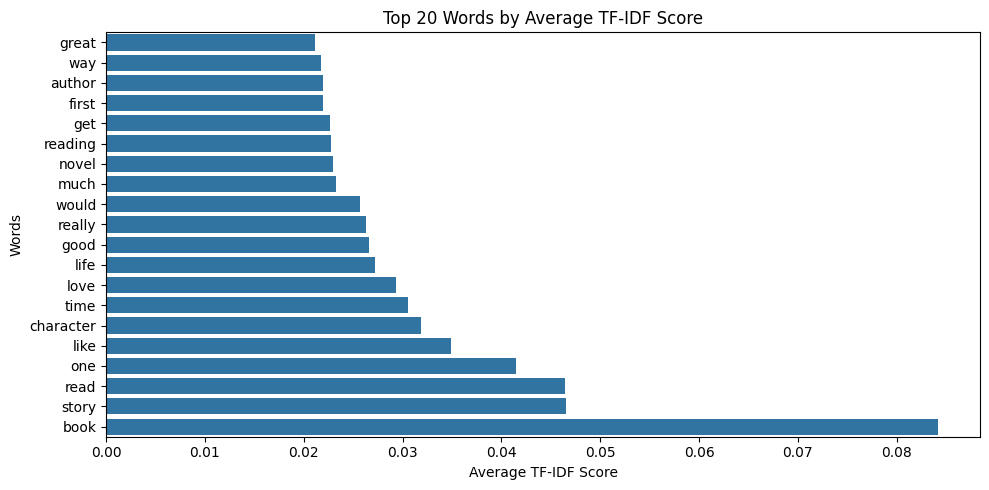

In [23]:
# === TF-IDF Visualization ===
import matplotlib.pyplot as plt
import seaborn as sns

# Top 20 words by average TF-IDF score
feature_names = vectorizer.get_feature_names_out()
avg_tfidf = X_tfidf.mean(axis=0).A1
top_indices = np.argsort(avg_tfidf)[-20:]
top_features = [feature_names[i] for i in top_indices]
top_scores = avg_tfidf[top_indices]

plt.figure(figsize=(10, 5))
sns.barplot(x=top_scores, y=top_features)
plt.title("Top 20 Words by Average TF-IDF Score")
plt.xlabel("Average TF-IDF Score")
plt.ylabel("Words")
plt.tight_layout()
plt.show()


In [16]:
# PART 2: Word Embeddings (Word2Vec) 

print("\n=== Word2Vec Embeddings ===")

# Train Word2Vec (CBOW)
w2v_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=2, sg=0, workers=4)

# Function to average word vectors
def avg_vector(tokens, model, size):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if not vectors:
        return np.zeros(size)
    return np.mean(vectors, axis=0)

embedding_size = 100
df['w2v_vector'] = df['tokens'].apply(lambda x: avg_vector(x, w2v_model, embedding_size))

# Convert to matrix
X_w2v = np.vstack(df['w2v_vector'].values)
print("Word2Vec Vector Shape:", X_w2v.shape)



=== Word2Vec Embeddings ===
Word2Vec Vector Shape: (79467, 100)


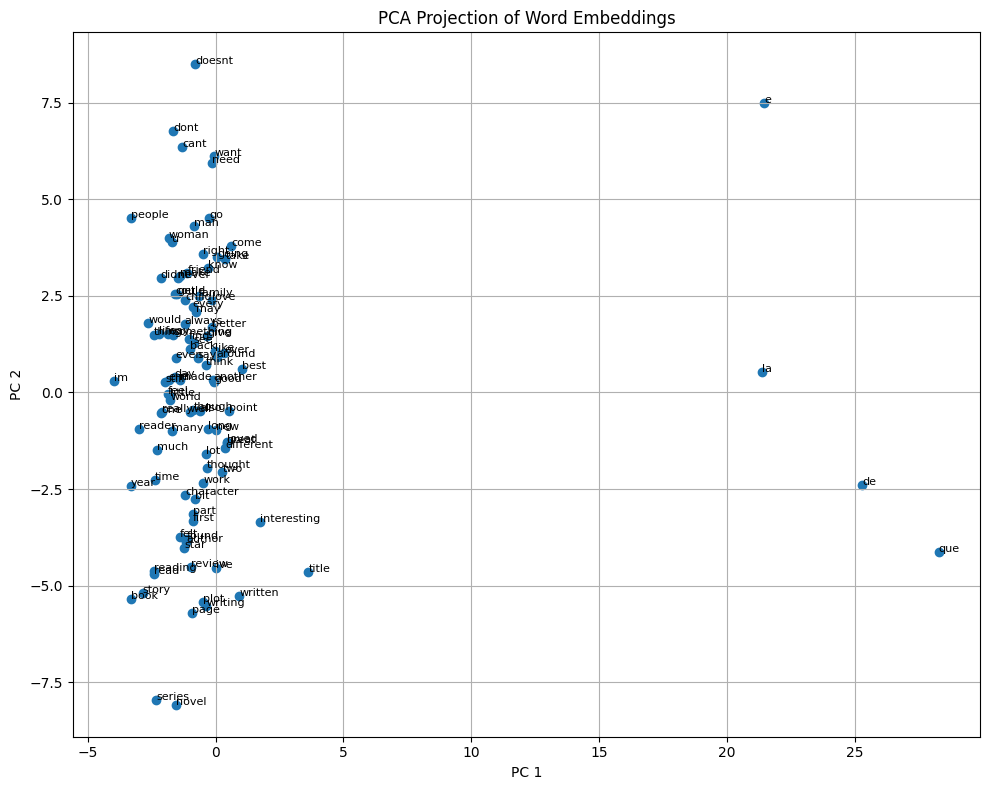

In [24]:
# === Word2Vec Visualization with PCA ===
from sklearn.decomposition import PCA

# Select some common words to visualize
words_to_visualize = [word for word in w2v_model.wv.index_to_key[:100]]  # Top 100 words
word_vectors = np.array([w2v_model.wv[word] for word in words_to_visualize])

# Apply PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 8))
plt.scatter(reduced[:, 0], reduced[:, 1])

for i, word in enumerate(words_to_visualize):
    plt.annotate(word, xy=(reduced[i, 0], reduced[i, 1]), fontsize=8)

plt.title("PCA Projection of Word Embeddings")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
#  PART 3: Sentiment Label Verification / Assignment 
print("\n=== Sentiment Labeling ===")

# A. If rating exists — label it
if 'rating' in df.columns:
    df['sentiment'] = df['rating'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral'))
    print(df['sentiment'].value_counts())

# B. Else use VADER
else:
    sia = SentimentIntensityAnalyzer()
    def label_sentiment(text):
        score = sia.polarity_scores(text)['compound']
        return 'positive' if score >= 0.05 else 'negative' if score <= -0.05 else 'neutral'
    
    df['sentiment'] = df['cleaned'].apply(label_sentiment)
    print(df['sentiment'].value_counts())



=== Sentiment Labeling ===
sentiment
positive    55713
negative    14528
neutral      9226
Name: count, dtype: int64


C:\Users\ramya\AppData\Local\Temp\ipykernel_14056\771488135.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='pastel', order=['positive', 'neutral', 'negative'])


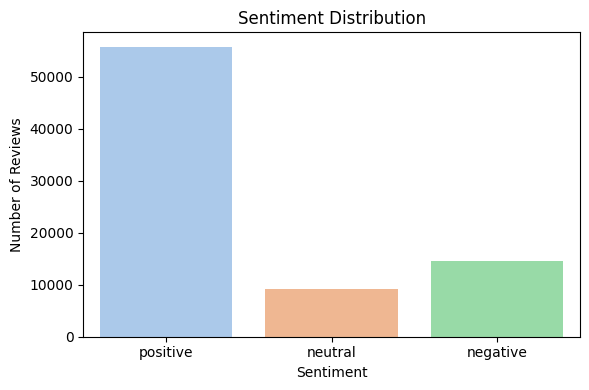

In [25]:
# === Sentiment Distribution Visualization ===
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df, palette='pastel', order=['positive', 'neutral', 'negative'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

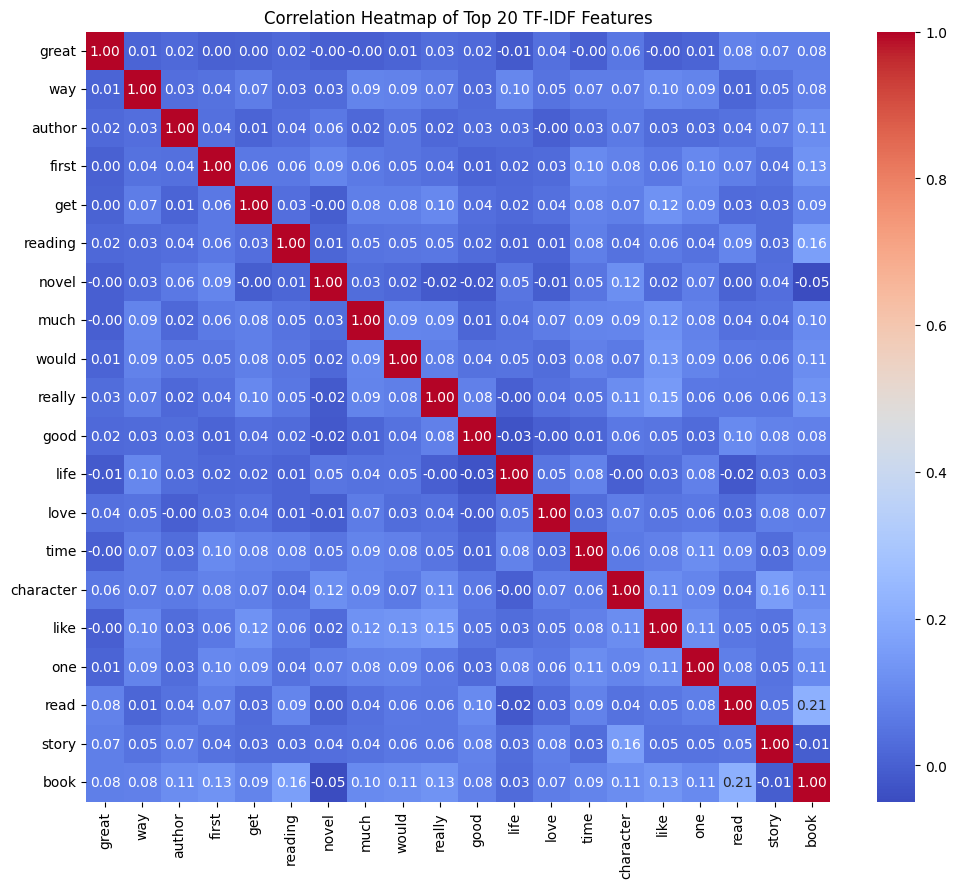

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select top 20 features by average TF-IDF score (same as before)
top_indices = np.argsort(avg_tfidf)[-20:]
top_features = [feature_names[i] for i in top_indices]

# Create a dense matrix of TF-IDF values for these features (may be large, so subset!)
tfidf_dense_subset = X_tfidf[:, top_indices].toarray()

# Calculate correlation matrix between features
corr_matrix = pd.DataFrame(tfidf_dense_subset, columns=top_features).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Top 20 TF-IDF Features")
plt.show()


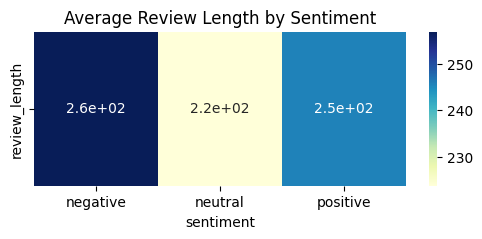

In [27]:
# Example: average review length per sentiment
df['review_length'] = df['cleaned'].apply(lambda x: len(x.split()))

pivot_table = df.pivot_table(index='sentiment', values='review_length', aggfunc='mean').T

plt.figure(figsize=(6, 2))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title("Average Review Length by Sentiment")
plt.show()


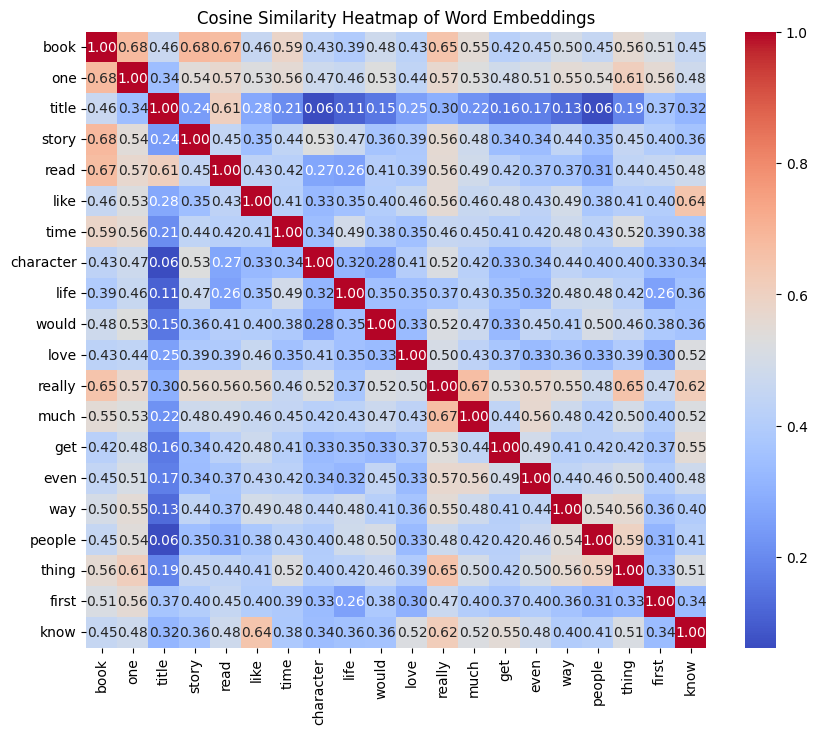

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

words_to_compare = words_to_visualize[:20]  # smaller set for clarity
vectors = np.array([w2v_model.wv[word] for word in words_to_compare])
similarity_matrix = cosine_similarity(vectors)

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, xticklabels=words_to_compare, yticklabels=words_to_compare, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Cosine Similarity Heatmap of Word Embeddings")
plt.show()

In [19]:
df.to_csv("D:/Database/database/cleaned_datasets/processed_reviews.csv", index=False)